## Gaussian Process Tests

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

plt.style.use("bmh")
sys.path.append("../src/")
from kernels import ExponentiatedQuadraticKernel
from gaussian_process import GaussianProcess

In [2]:
N = 100
theta = np.array([np.random.uniform(1, np.exp(5)), np.random.uniform(1, np.exp(2))]).T
sigma = np.random.uniform(0, 1)
T = np.linspace(0, 20, 2*N)
Cov = ExponentiatedQuadraticKernel.compute_all(theta, T) + sigma * np.identity(2 * N)
Y = np.random.multivariate_normal(np.zeros_like(T), Cov)
T_train = T[:N]
T_test = T[N:]
Y_train = Y[:N]
Y_test = Y[N:]

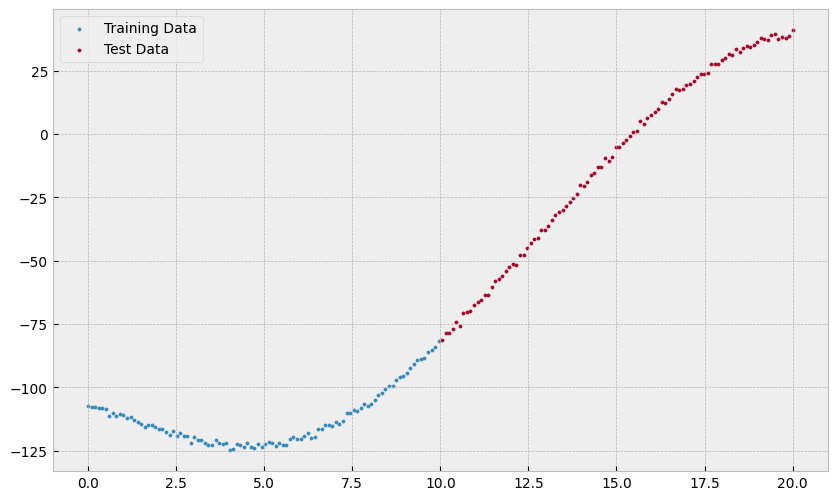

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(T_train, Y_train, label='Training Data', s=5)
plt.scatter(T_test, Y_test, label="Test Data", s=5)
plt.legend()
plt.show()

In [4]:
GP = GaussianProcess(kernel=ExponentiatedQuadraticKernel, theta=theta, sigma=sigma)
GP.fit(T_train, Y_train)
mean_test, Cov_test = GP.predict(T_test)

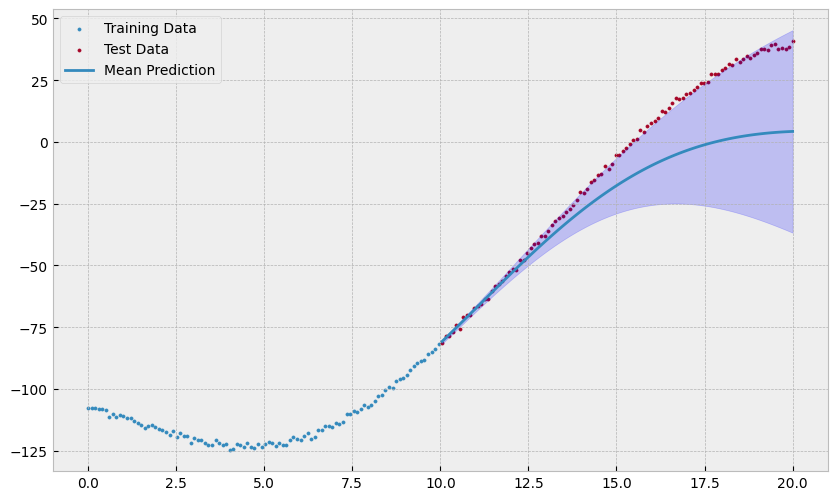

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(T_train, Y_train, label='Training Data', s=5)
plt.scatter(T_test, Y_test, label="Test Data", s=5)
plt.plot(T_test, mean_test, label='Mean Prediction')
plt.fill_between(T_test, mean_test - np.sqrt(np.diag(Cov_test)),
                mean_test + np.sqrt(np.diag(Cov_test)), color='blue', alpha=0.2)
plt.legend()
plt.show()